In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow import keras
from keras import layers
from keras.models import Model

In [ ]:
(x_train, y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train=x_test/255.0
x_test=x_test/255.0

In [ ]:
latent_dim=64

In [ ]:
class Autoencoder(Model):
  def __init__(self, encoding_dims):
    super(Autoencoder, self).__init__()
    self.latent_dim=latent_dim
    self.encoder=keras.Sequential(
        [
         keras.layers.Flatten(),
         keras.layers.Dense(latent_dim, activation='relu')
        ]
    )
    self.decoder=keras.Sequential(
        [
         keras.layers.Dense(784, activation='sigmoid'),
         keras.layers.Reshape((28,28))
        ]
    )
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [ ]:
autoencoder=Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

In [ ]:
output=autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test) ) 

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0506 - val_loss: 0.0289
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0252 - val_loss: 0.0218
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0197 - val_loss: 0.0175
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0164 - val_loss: 0.0151
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 0.0128
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0108

In [ ]:
encoded_img=autoencoder.encoder(x_test).numpy()

In [ ]:
decoded_img=autoencoder.decoder(encoded_img).numpy()

In [ ]:
encoded_img.shape

(10000, 64)

In [ ]:
decoded_img.shape

(10000, 28, 28)

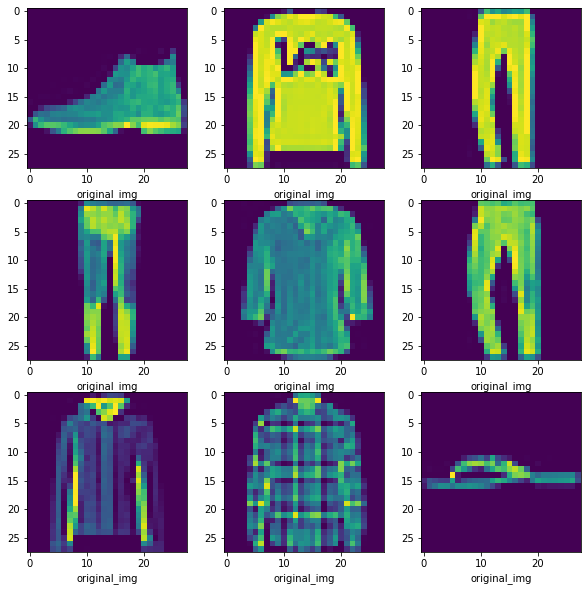

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i])
  plt.xlabel('original_img')



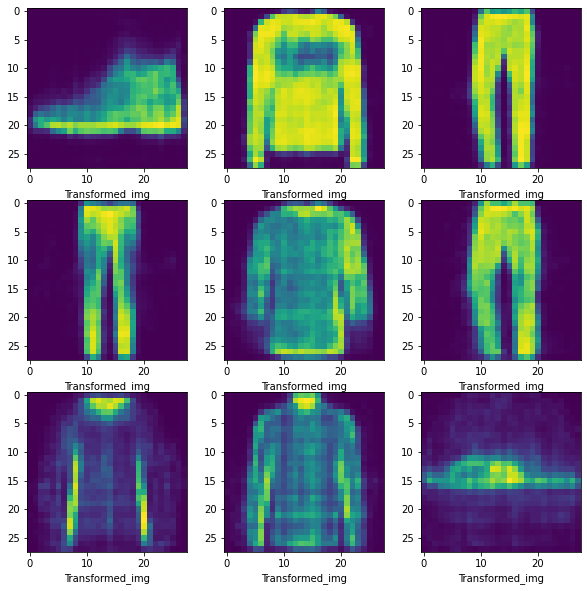

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(decoded_img[i])
  plt.xlabel('Transformed_img')